In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\shano\OneDrive\Desktop\hotel_booking.csv")
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [4]:
df.drop(["name","email","phone-number","credit_card"],axis=1,inplace=True)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df["children"].fillna(0,inplace=True)
df["agent"].fillna(0,inplace=True)
df["company"].fillna(0,inplace=True)
df["country"].fillna("others",inplace=True)

In [7]:
df["total_people"]=df["adults"]+df["children"]+df["babies"]
df["total_stay"]=df["stays_in_week_nights"]+df["stays_in_weekend_nights"]
df.query("adults !=0 | babies != 0 | children != 0")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7


Data visualization

In [8]:
G1 = df["hotel"].value_counts().reset_index()
G1 = pd.DataFrame(G1)
fig = px.pie(G1,names="hotel",values="count",title="Hotel Preference")
fig.update_layout(title_x = 0.46)
fig.show()

In [9]:
G2 = df["is_canceled"].value_counts().reset_index()
G2 = pd.DataFrame(G2)
fig = px.pie(G2,names="is_canceled",values="count",title="Cancellation",color="is_canceled",color_discrete_map={0:"teal",1:"coral"})
fig.update_layout(title_x = 0.46)
fig.show()

C:\Users\shano\AppData\Local\Temp\ipykernel_15600\53275319.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




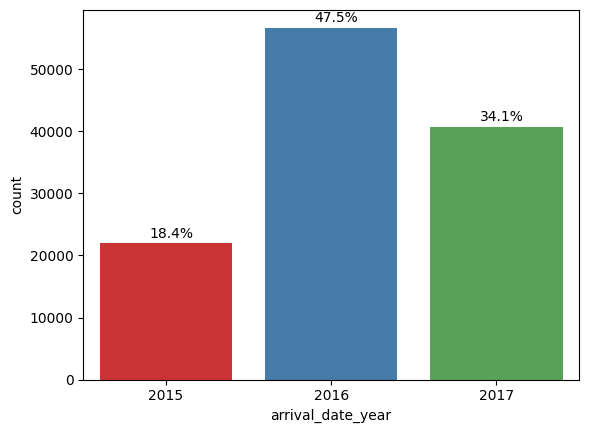

In [10]:
G3 = df["arrival_date_year"].value_counts()
G3=pd.DataFrame(G3)
ax=sns.barplot(x="arrival_date_year",y='count',data=G3,palette="Set1")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/G3["count"].sum()*100:.1f}%',xy=(p.get_x()+0.3 , height),xytext=(0,4),textcoords="offset points")

C:\Users\shano\AppData\Local\Temp\ipykernel_15600\1563204607.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Percentage of people')

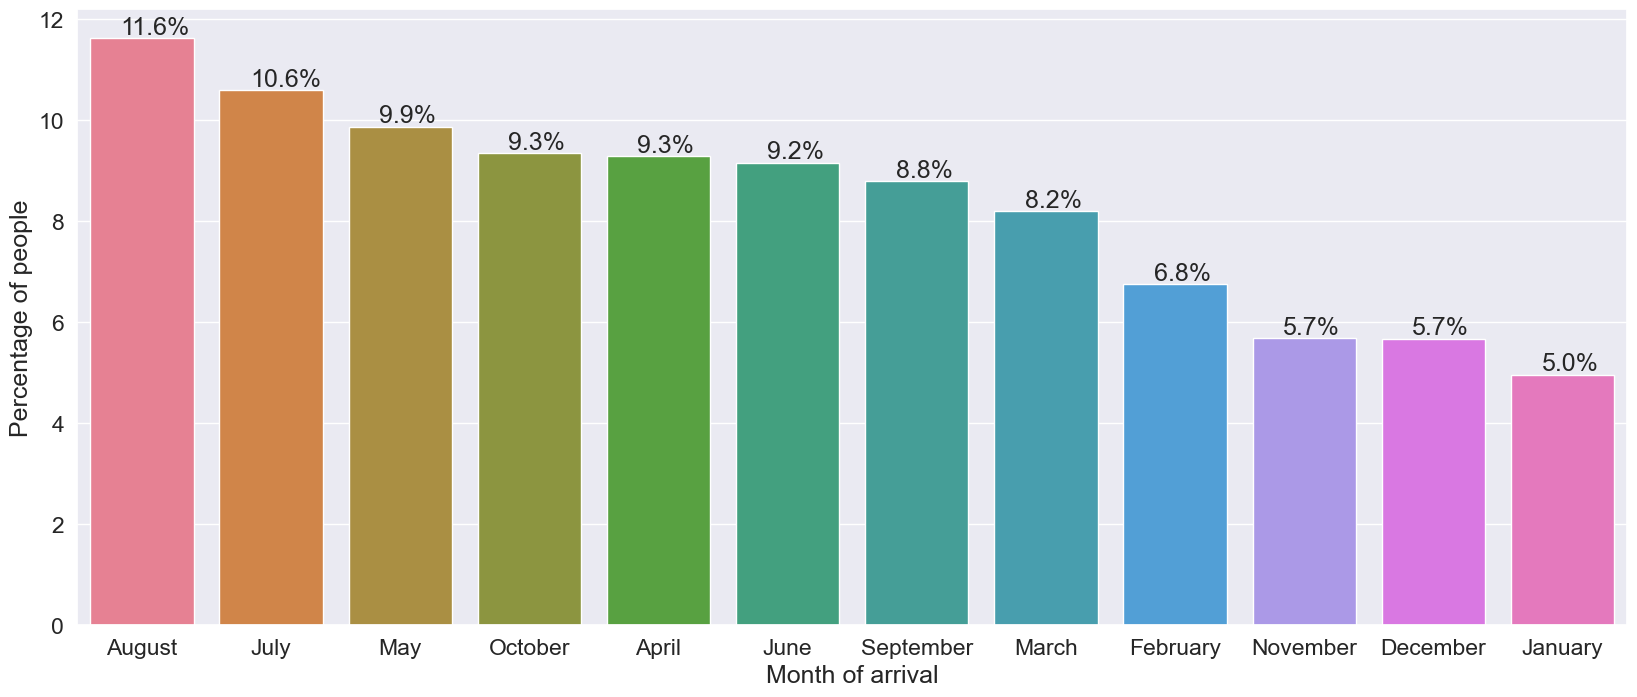

In [11]:
G4 = df["arrival_date_month"].value_counts(normalize=True)*100
G4=pd.DataFrame(G4)
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
ax=sns.barplot(x="arrival_date_month",y='proportion',data=G4,palette="husl")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',xy = (p.get_x(),height),xytext = (22,3),textcoords="offset points")
ax.set_xlabel("Month of arrival")
ax.set_ylabel("Percentage of people")


C:\Users\shano\AppData\Local\Temp\ipykernel_15600\3474526901.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'types')

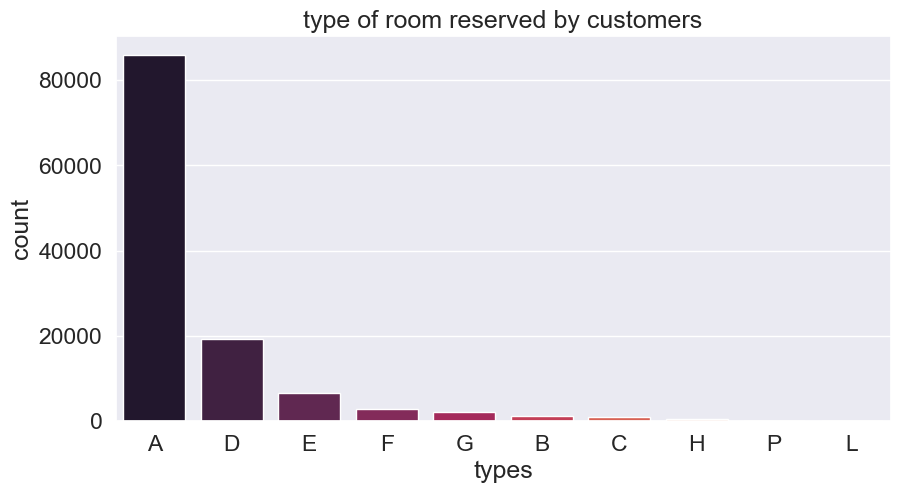

In [12]:
plt.figure(figsize=(10,5))
order = df["reserved_room_type"].value_counts().sort_values(ascending=False).index.to_list()
ax = sns.countplot(x="reserved_room_type",data=df,palette="rocket",order=order)
plt.title("type of room reserved by customers")
ax.set_xlabel("types")

C:\Users\shano\AppData\Local\Temp\ipykernel_15600\3023009974.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'types')

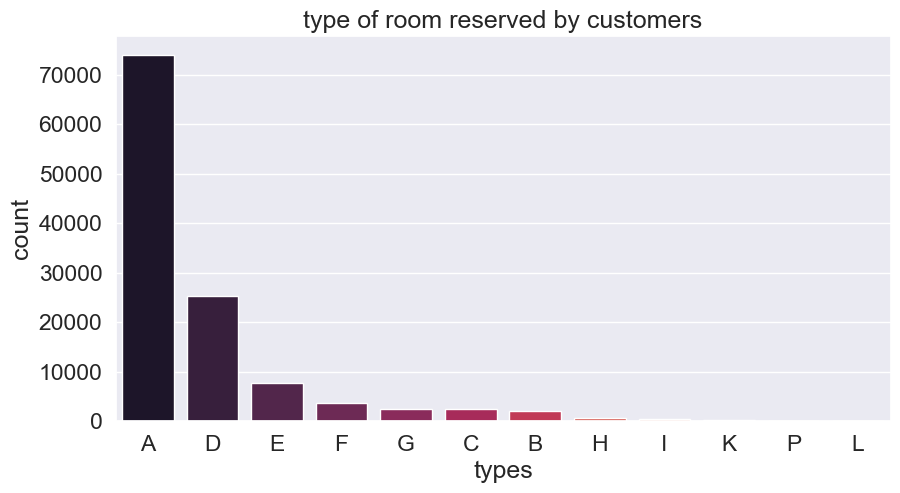

In [13]:

plt.figure(figsize=(10,5))
order = df["assigned_room_type"].value_counts().sort_values(ascending=False).index.to_list()
ax = sns.countplot(x="assigned_room_type",data=df,palette="rocket",order=order)
plt.title("type of room reserved by customers")
ax.set_xlabel("types")

In [19]:
G5=df["is_repeated_guest"].value_counts().reset_index()
G5=pd.DataFrame(G5)
px.pie(G5,names="is_repeated_guest",values="count")

In [21]:
df.columns
G6=df["customer_type"].value_counts().reset_index()
G6=pd.DataFrame(G6)
px.pie(G6,names="customer_type",values="count")

C:\Users\shano\AppData\Local\Temp\ipykernel_15600\3624678891.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'types')

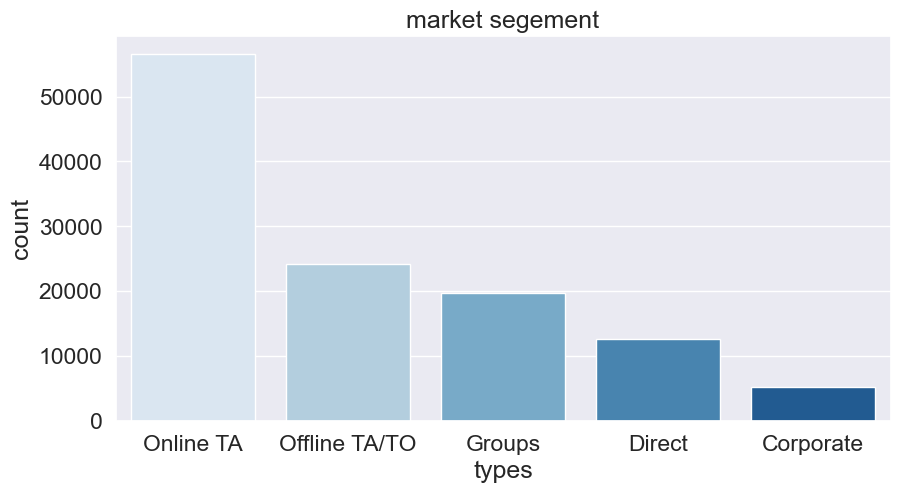

In [33]:

plt.figure(figsize=(10,5))
order = df["market_segment"].value_counts().head().sort_values(ascending=False).index.to_list()
ax = sns.countplot(x="market_segment",data=df,palette="Blues",order=order)
plt.title("market segement")
ax.set_xlabel("types")

In [34]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

Bivariate and multivariate

Text(0.5, 1.0, 'Total number of stay in hotel')

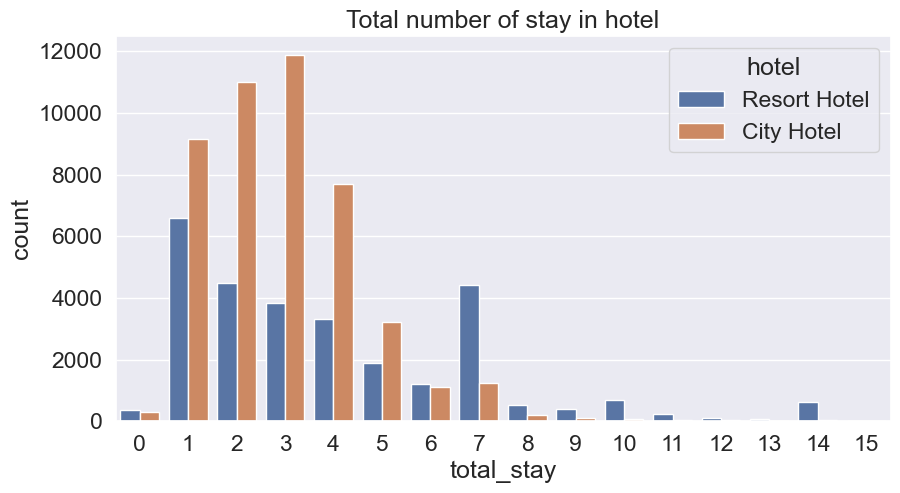

In [43]:
not_canceled = df[df["is_canceled"]==0]
hotel_stay=not_canceled[not_canceled["total_stay"]<=15]
plt.figure(figsize=(10,5))
sns.countplot(x="total_stay",hue="hotel",data=hotel_stay)
plt.title("Total number of stay in hotel")

Text(0.5, 1.0, 'percentage revenue per hotel type')

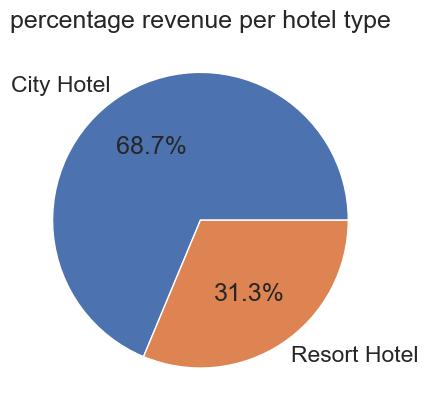

In [52]:
most_rev = df.groupby("hotel")["adr"].sum()
sizes= [8353803.24, 3803814.36]
labels=["City Hotel","Resort Hotel"]
plt.pie(sizes,labels=labels,autopct='%.1f%%')
plt.title("percentage revenue per hotel type")

C:\Users\shano\AppData\Local\Temp\ipykernel_15600\2634688194.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'mean days of waiting ')

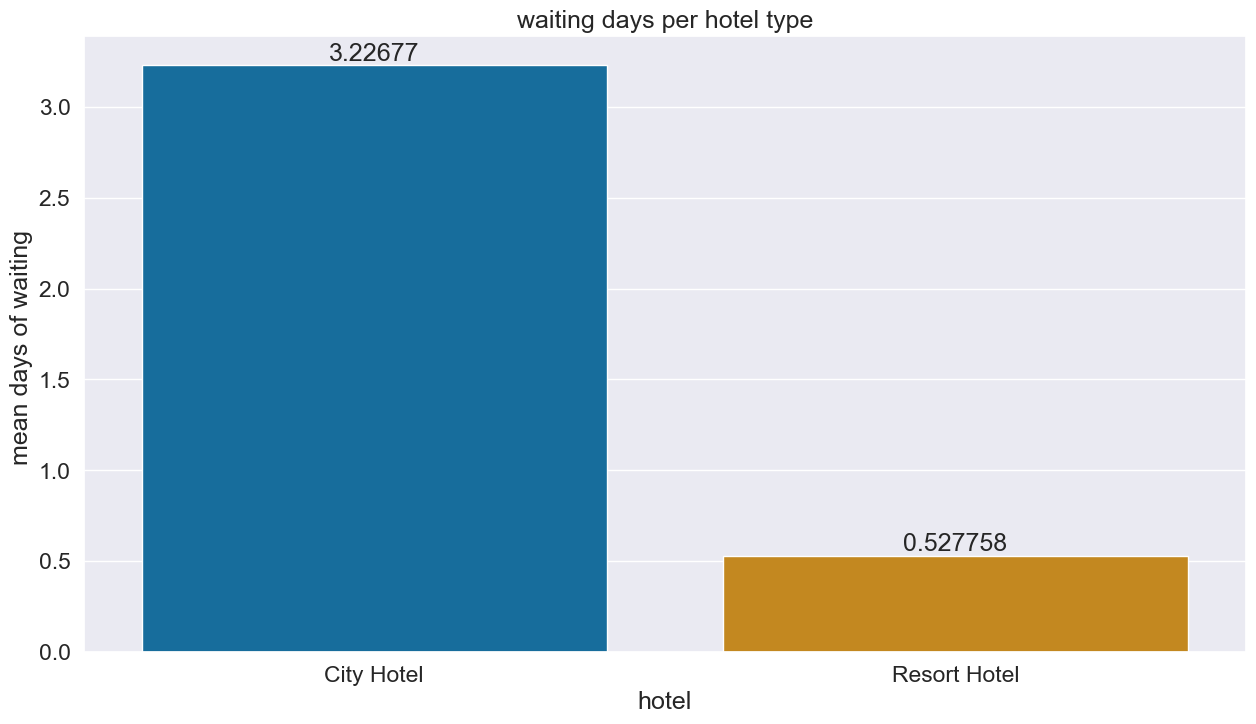

In [65]:
waiting_time = df.groupby("hotel")['days_in_waiting_list'].mean()
waiting_time=pd.DataFrame(waiting_time)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='hotel',y="days_in_waiting_list",data=waiting_time,palette="colorblind")
for p in ax.containers:
    ax.bar_label(p)
plt.title("waiting days per hotel type")
ax.set_ylabel("mean days of waiting ")

Text(0.5, 1.0, 'month with most revenue')

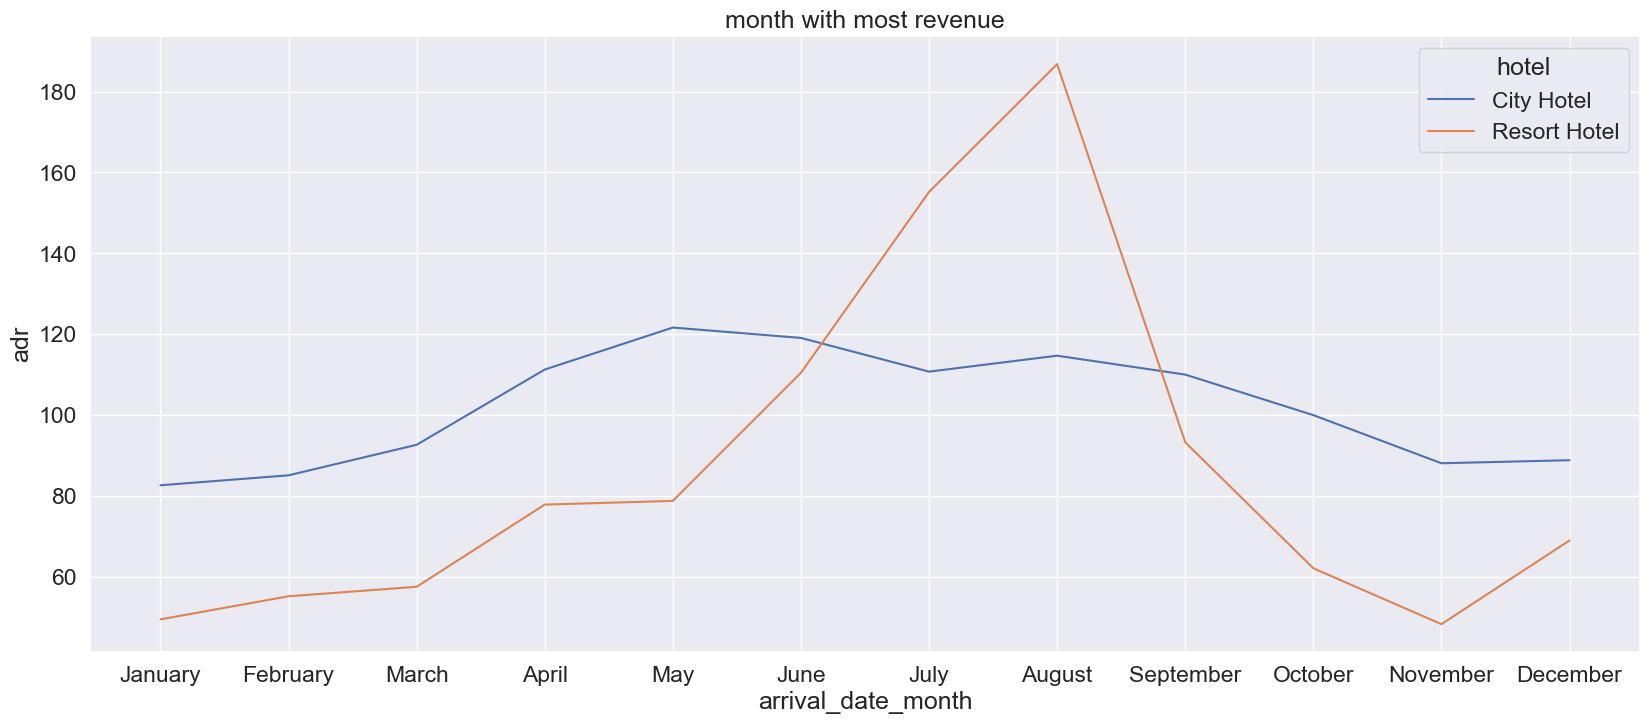

In [88]:
adrmonth = df.groupby(["arrival_date_month","hotel"])['adr'].mean().reset_index()
adrmonth=pd.DataFrame(adrmonth)
months = ['January',"February",'March','April',"May",'June',"July","August","September","October","November","December"]
adrmonth["arrival_date_month"]=pd.Categorical(adrmonth["arrival_date_month"],categories=months,ordered=True)
adrmonth = adrmonth.sort_values(by="arrival_date_month")
plt.figure(figsize=(20,8))
sns.lineplot(x="arrival_date_month",y='adr',hue='hotel',data = adrmonth)
plt.title("month with most revenue")

Text(0.5, 1.0, 'adr accross distribution channel')

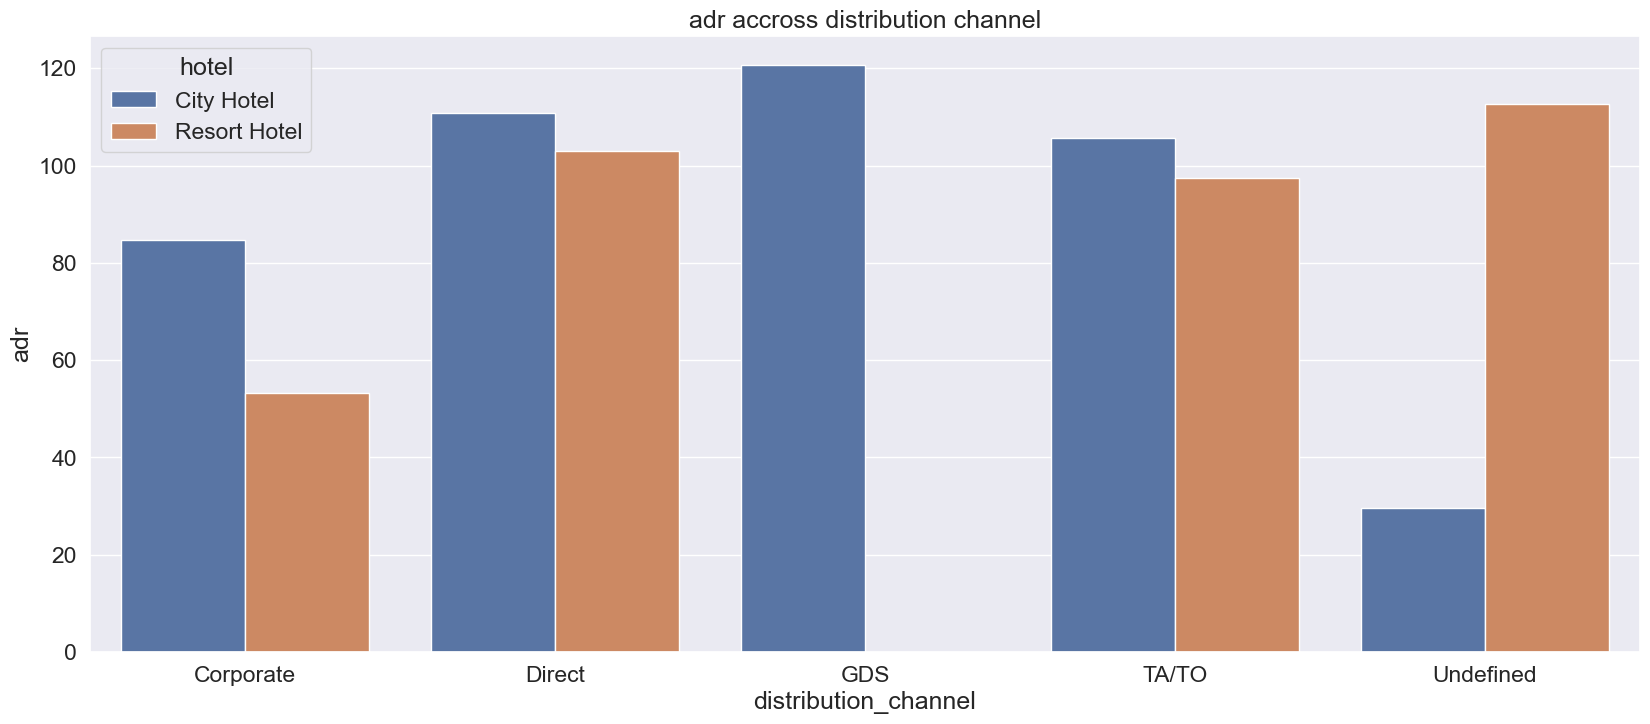

In [89]:
dmcadr = df.groupby(["distribution_channel","hotel"])['adr'].mean().reset_index()
dmcadr=pd.DataFrame(dmcadr)
plt.figure(figsize=(20,8))
sns.barplot(x="distribution_channel",y='adr',hue='hotel',data = dmcadr)
plt.title("adr accross distribution channel")

Correlation

Text(0.5, 1.0, 'correlation')

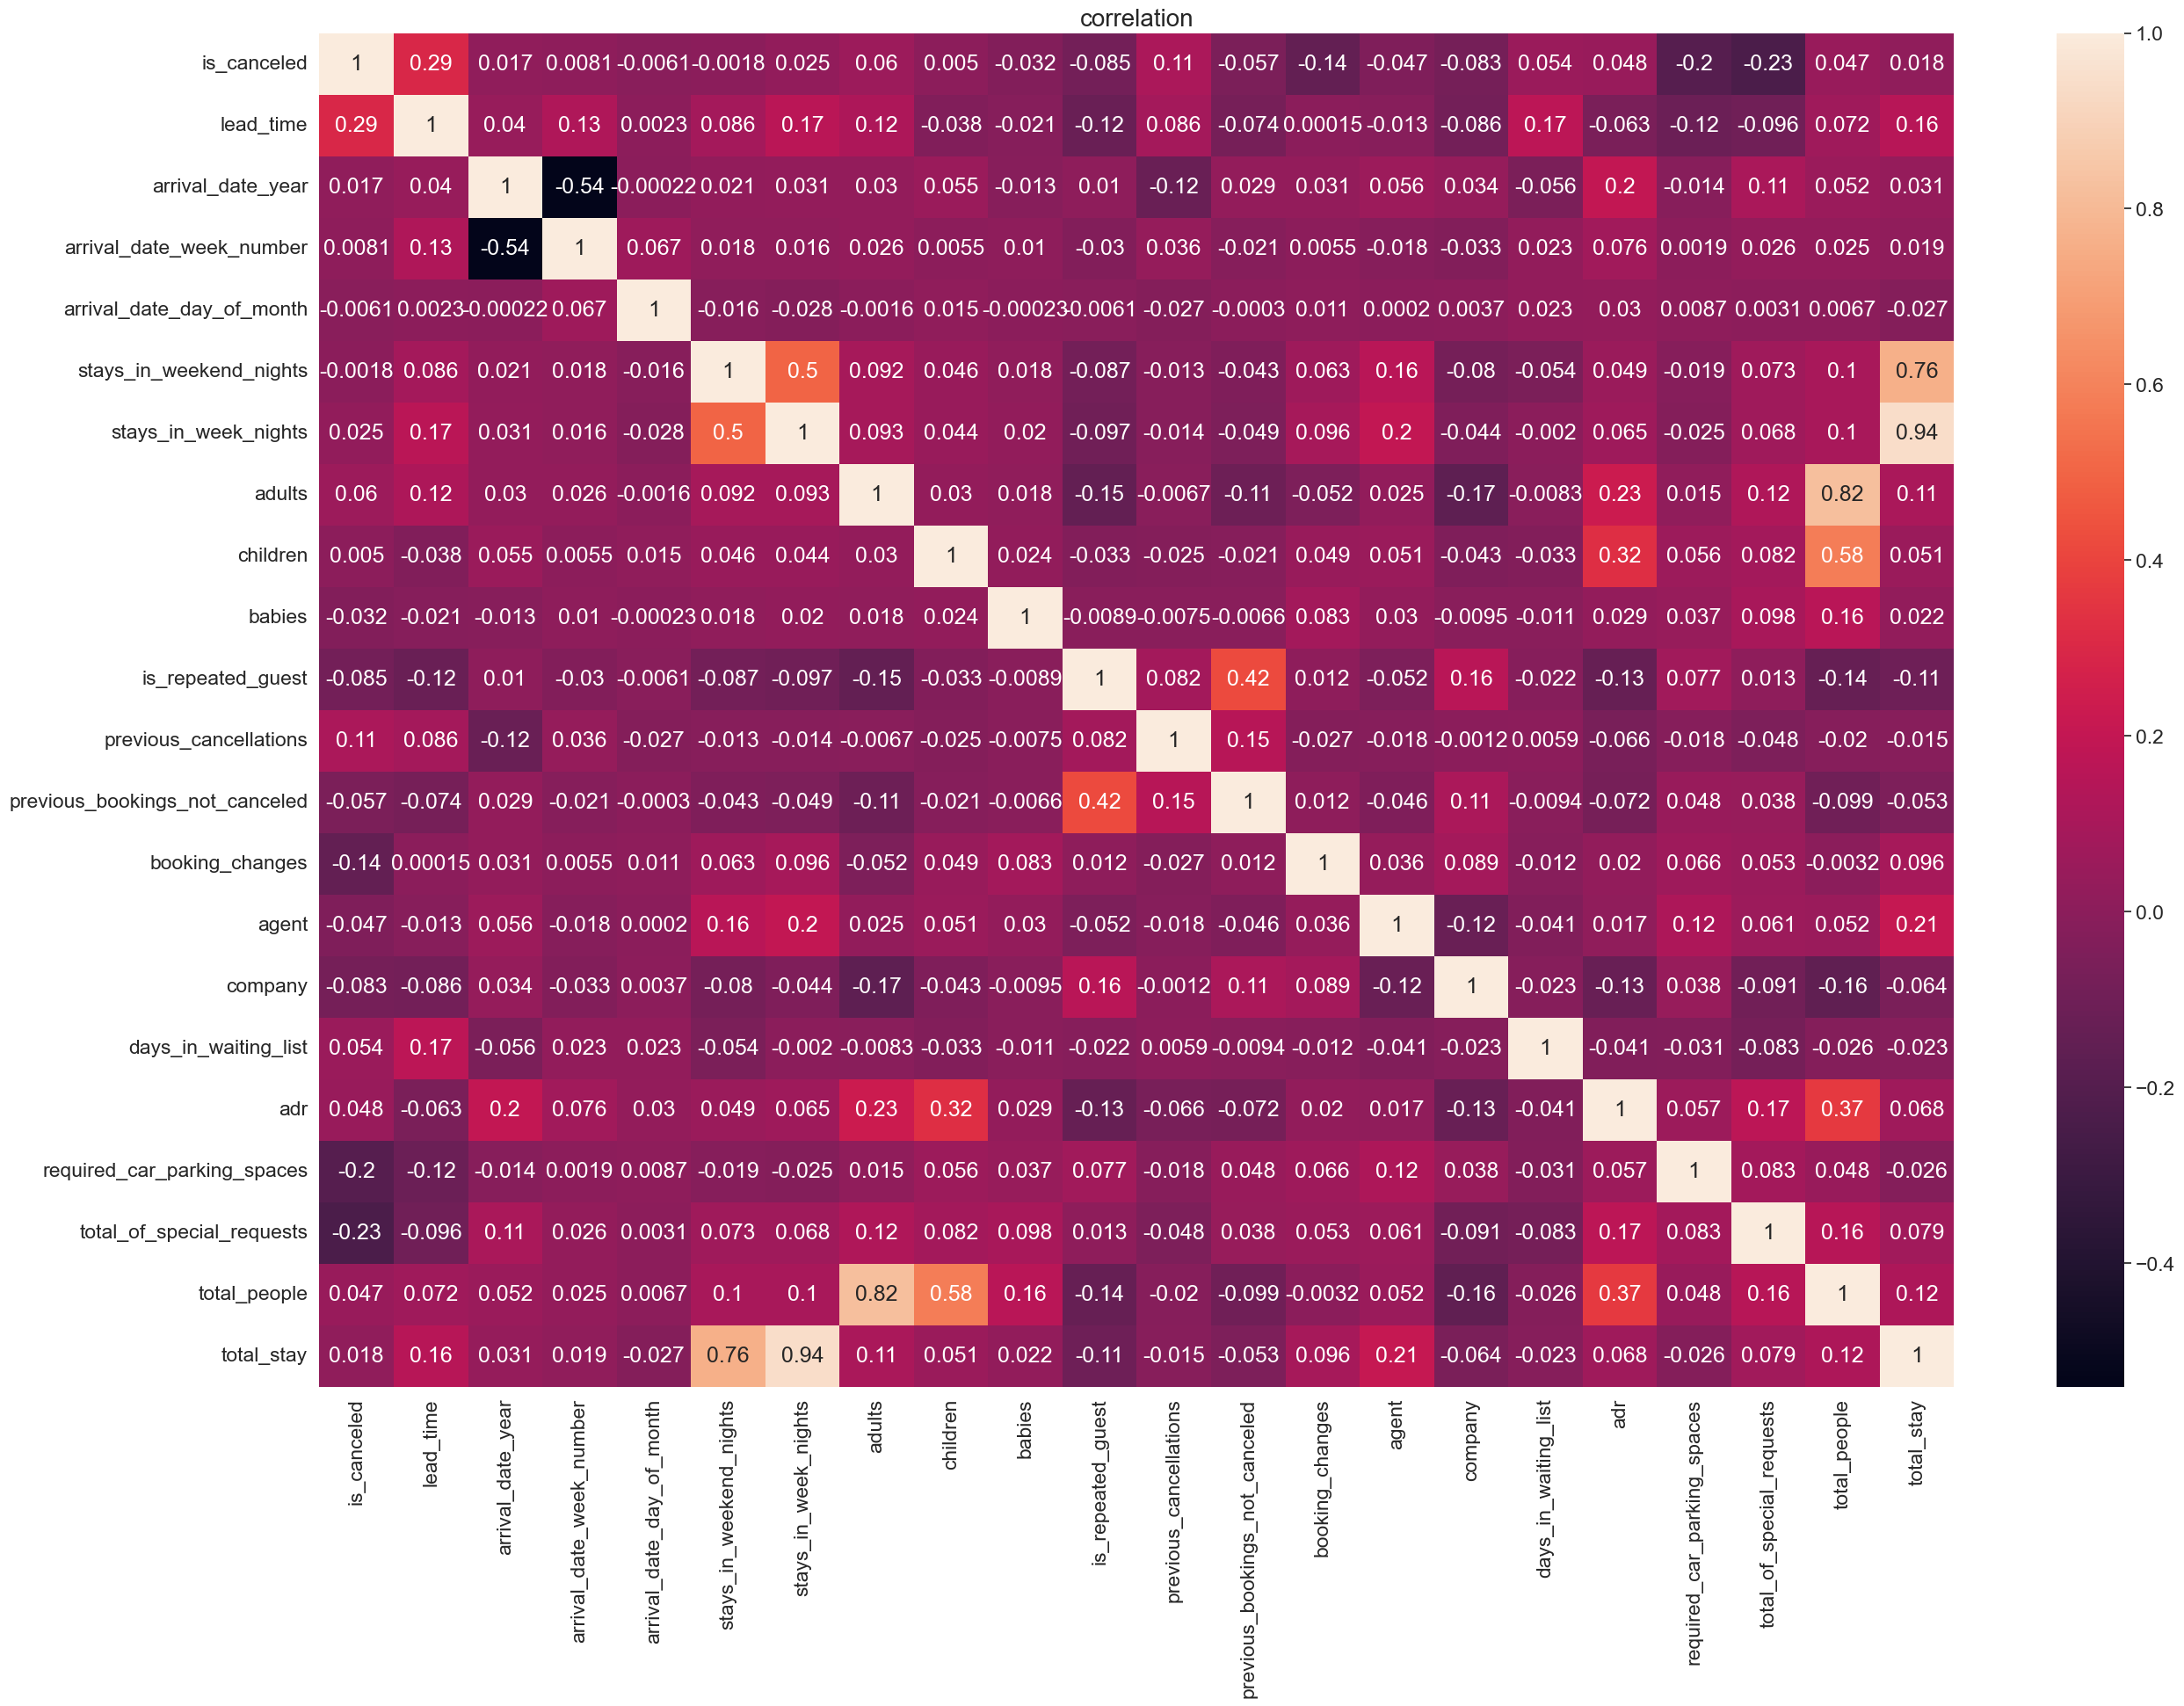

In [95]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("correlation",fontsize=20)

**CONCLUSION**
1.city hotel are more prefered type of hotel.
2.More guest arrived in august 2016.
3.Most prefered room type were A followed by D.So resort hotel can provide user benefits such as discount and other additional facilitite to increase booking in other room types.
4.only a few percentage (3.9%) were repeated costomers indicating decrease reurn costomers,this warrants urgent intervention from managemtn commitee to see into the issue that costomer are facing bczo of whcich repeat costomers are so lees.
5.Majority of the costomers were of transient type.
6.majority of the market segment were from online TA and very low from corporate.
7.Number of Stay days in city hotel were more compared to resort hotel.
8.Pecenatgae revenue form city hotel is more and waiting period is also more.
9.august gave highest reveneue for resort hotel in month of ausust.But declined lesser than city hotel in other months
10. GDS is the ony distribution channel for the city hotel
11.Lead time were correlated with more m=no. of stays
12.more number of adults were correlated with more revenue.
13.company booking were related to repeated guest.
14.special request were relaetd to increase in revenue.
